In [1]:
!nvidia-smi

Sat Apr 22 16:43:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.48.07    Driver Version: 515.48.07    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-PCI...  Off  | 00000000:21:00.0 Off |                    0 |
| N/A   22C    P0    49W / 250W |  30047MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import time
import torch
import gym
import matplotlib.pyplot as plt

from DQN import neural_net, DQN, lr, MEMORY_SIZE
from atari_wrappers import modify_env
from replay_memory import ReplayMemory

def env_test_render(env):
    # run random policy and render
    env.reset()
    for _ in range(1000):
        fig = plt.figure()
        arr = env.render(mode='rgb_array')
        plt.imshow(arr)
        plt.show()
        env.step(env.action_space.sample())
    env.close()
    return

# create environment
DEFAULT_ENV_NAME = "PongNoFrameskip-v4"
env = gym.make(DEFAULT_ENV_NAME)
env = modify_env(env)
# env_test_render(env)

# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create networks
policy_net = neural_net(n_actions=4).to(device)
target_net = neural_net(n_actions=4).to(device)
target_net.load_state_dict(policy_net.state_dict())

# setup optimizer
optimizer = torch.optim.Adam(policy_net.parameters(), lr=lr)

# initialize replay memory
memory = ReplayMemory(MEMORY_SIZE)

# train model
model = DQN(policy_net, target_net, optimizer, memory, device, n_actions=4)
model.train(env, 400)
torch.save(model.policy_net, "dqn_pong_model")

# test model
policy_net = torch.load("dqn_pong_model")
model.test(env, 1, policy_net, render=False)

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


Total steps: 755 	 Episode: 0/754 	 Total reward: -21.0
Total steps: 1584 	 Episode: 1/828 	 Total reward: -20.0
Total steps: 2404 	 Episode: 2/819 	 Total reward: -21.0
Total steps: 3303 	 Episode: 3/898 	 Total reward: -20.0
Total steps: 4216 	 Episode: 4/912 	 Total reward: -20.0
Total steps: 4976 	 Episode: 5/759 	 Total reward: -21.0
Total steps: 5732 	 Episode: 6/755 	 Total reward: -21.0
Total steps: 6643 	 Episode: 7/910 	 Total reward: -21.0
Total steps: 7652 	 Episode: 8/1008 	 Total reward: -19.0
Total steps: 8751 	 Episode: 9/1098 	 Total reward: -20.0
Total steps: 9507 	 Episode: 10/755 	 Total reward: -21.0
Total steps: 10328 	 Episode: 11/820 	 Total reward: -21.0
Total steps: 11174 	 Episode: 12/845 	 Total reward: -21.0
Total steps: 12165 	 Episode: 13/990 	 Total reward: -20.0
Total steps: 12943 	 Episode: 14/777 	 Total reward: -21.0
Total steps: 13828 	 Episode: 15/884 	 Total reward: -20.0
Total steps: 14649 	 Episode: 16/820 	 Total reward: -21.0
Total steps: 1560

In [16]:
    def plot(self, logarithmic=False):  # sourcery skip: extract-duplicate-method
        import matplotlib.pyplot as plt
        log = self.log
        fig, ax = plt.subplots(1, 3, figsize=(20, 5))
        ax[0].plot(log['episode'], log['total_reward'], '.')
        ax[0].set_title('Total Reward')
        ax[0].set_xlabel('Episode #')
        ax[1].plot(log['episode'], log['reward'], '.')
        ax[1].set_title('Reward')
        ax[1].set_xlabel('Episode #')
        ax[2].plot(log['episode'], log['loss'], '.')
        ax[2].set_title('Loss')
        ax[2].set_xlabel('Episode #')
        if logarithmic:
            ax[2].set_yscale('log')
        plt.savefig(f'training_per_episode_log_{logarithmic}.png', dpi=300, bbox_inches='tight')
        plt.show()

        fig, ax = plt.subplots(1, 3, figsize=(20, 5))
        ax[0].plot(log['steps_done'], log['total_reward'], '.')
        ax[0].set_title('Total Reward')
        ax[0].set_xlabel('Steps Done')
        ax[1].plot(log['steps_done'], log['reward'], '.')
        ax[1].set_title('Reward')
        ax[1].set_xlabel('Steps Done')
        ax[2].plot(log['steps_done'], log['loss'], '.')
        ax[2].set_title('Loss')
        ax[2].set_xlabel('Steps Done')
        if logarithmic:
            ax[0].set_xscale('log')
            ax[1].set_xscale('log')
            ax[2].set_xscale('log')
            ax[2].set_yscale('log')
        plt.savefig(f'training_per_step_log_{logarithmic}.png', dpi=300, bbox_inches='tight')
        plt.show()
        return


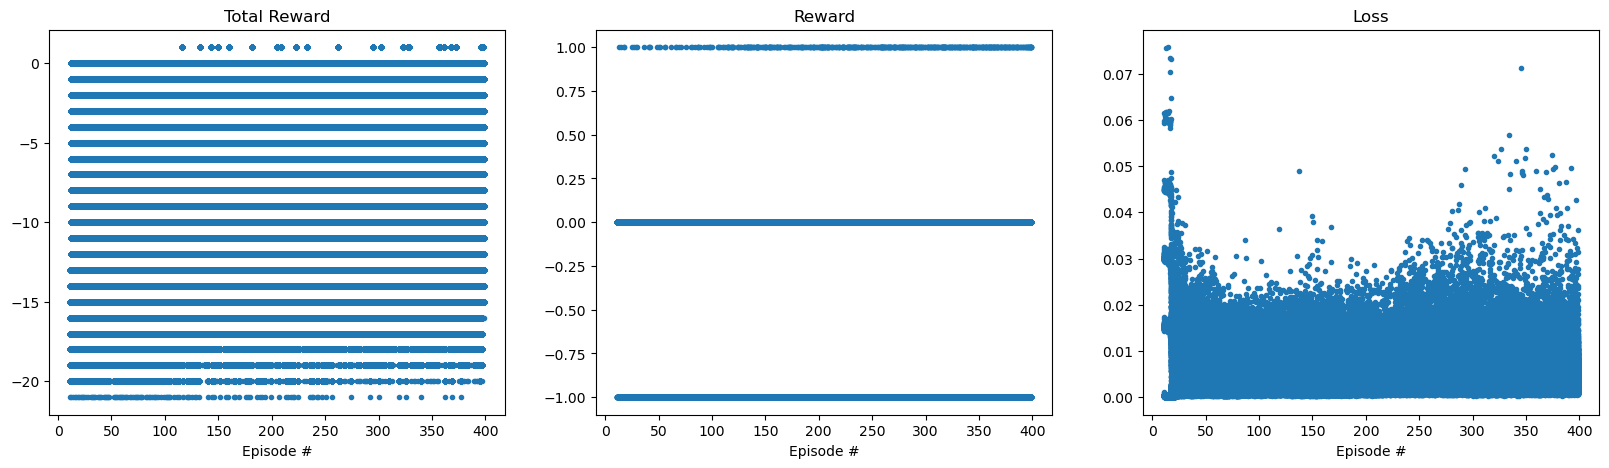

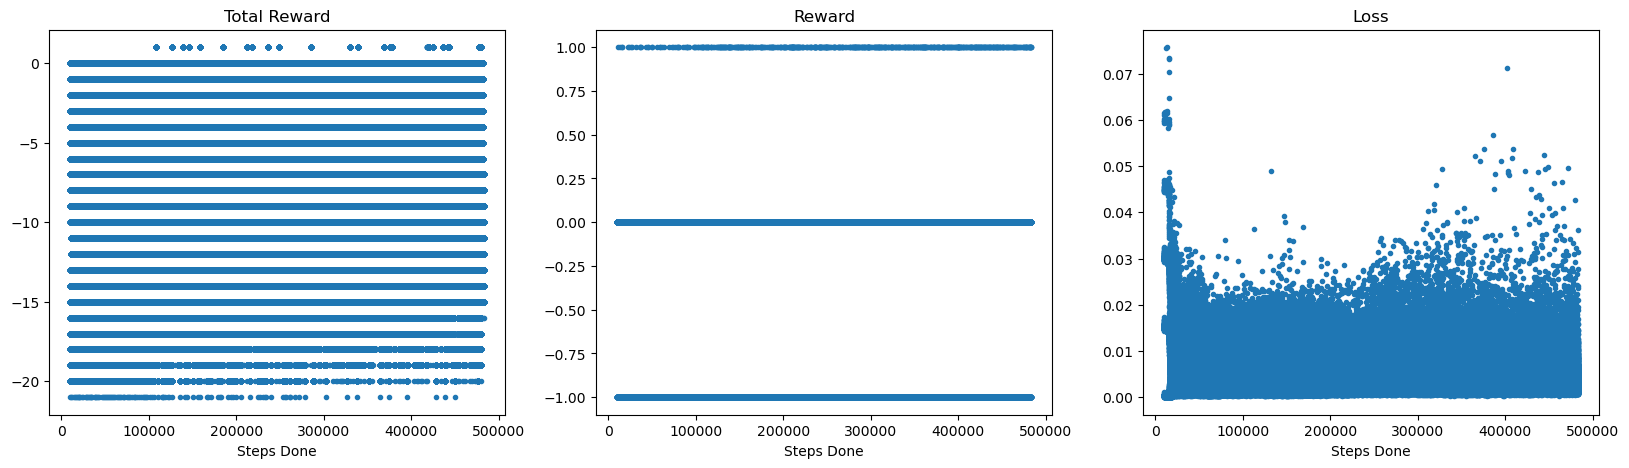

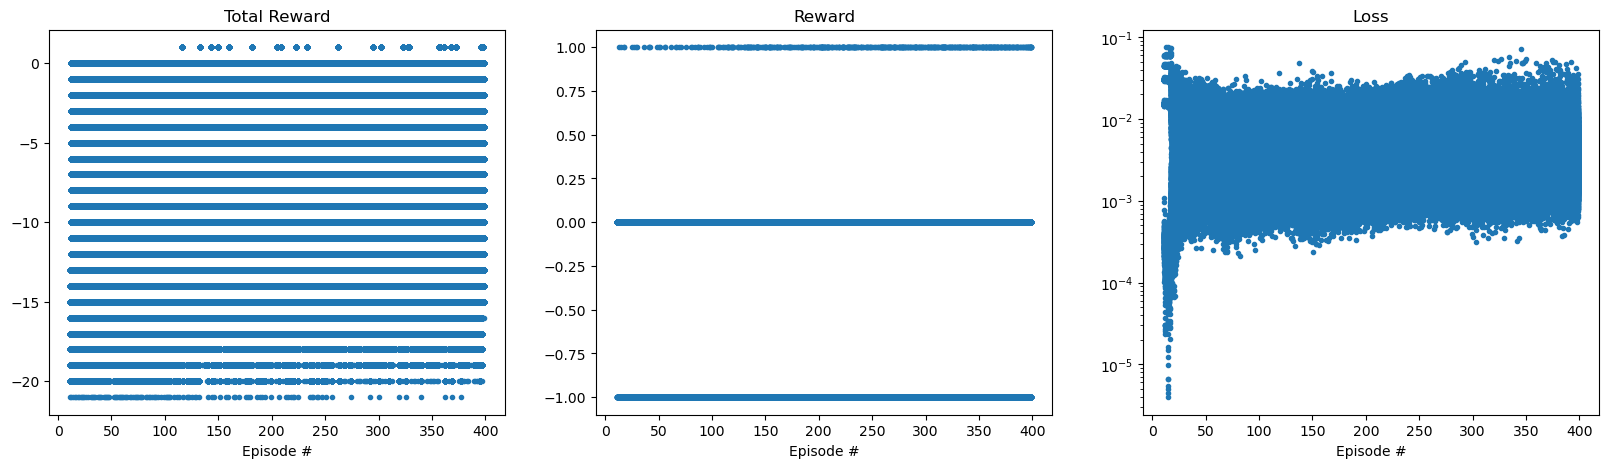

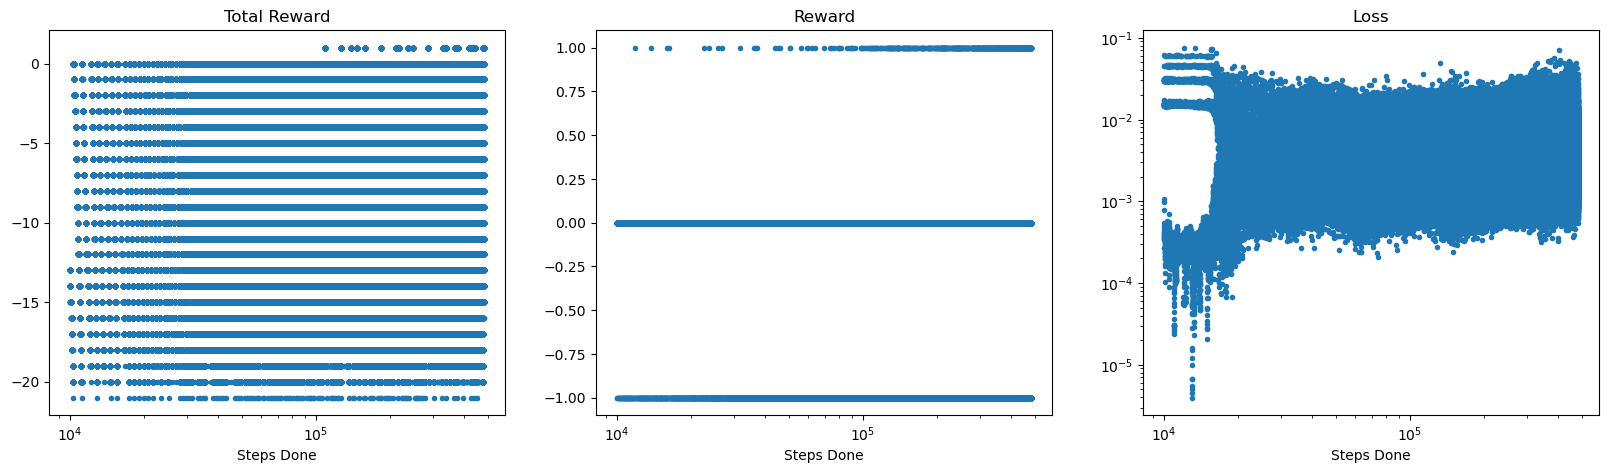

In [17]:
plot(model)
plot(model, logarithmic=True)

In [18]:
import numpy as np
n_steps = len(model.log['steps_done'])
array = np.zeros((n_steps, 5))
array[:, 0] = model.log['steps_done']
array[:, 1] = model.log['episode']
array[:, 2] = model.log['reward']
array[:, 3] = model.log['total_reward']
array[:, 4] = model.log['loss']
np.savetxt('dqn_pong_model.csv', array, delimiter=',', header='steps_done,episode,reward,total_reward,loss')